## AMEO 2015 Analysis

***
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO).
The study is primarily limited only to students with engineering disciplines.
The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, 
and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and 
personality skills.
The dataset also contains demographic features. The dataset contains around 40 independent variables and 4000 data points.
The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each 
candidate. Below mentioned table contains the details for the original dataset.
***

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [5]:
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
df.shape

(3998, 39)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [9]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [8]:
#Selecting numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)

Skewness:6.45
Kurtosis:80.93


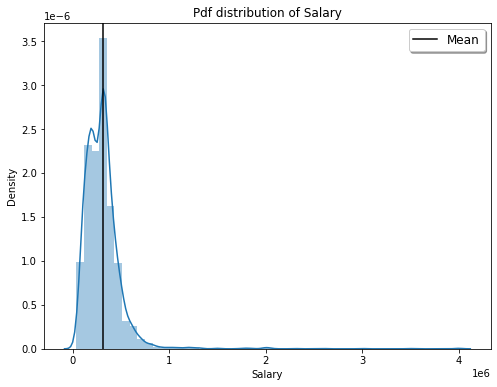

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(df['Salary'])
plt.axvline(df['Salary'].mean(),color='black', label='Mean')
plt.title("Pdf distribution of Salary")
plt.legend(shadow=True,fontsize="larger")

skew = df['Salary'].skew()
kurt = df['Salary'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

Skewness:-0.03
Kurtosis:-0.63


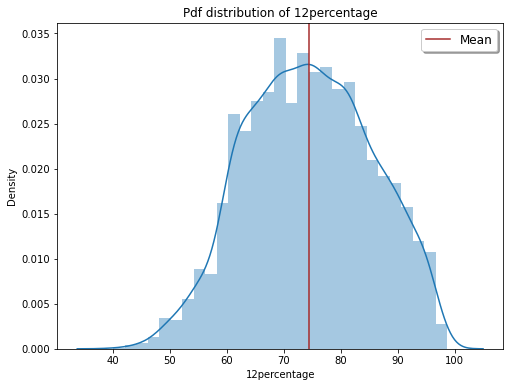

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(df['12percentage'])
plt.axvline(df['12percentage'].mean(), color="brown", label="Mean")
plt.title("Pdf distribution of 12percentage")
plt.legend(shadow=True,fontsize="larger")

skew = df['12percentage'].skew()
kurt = df['12percentage'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

Skewness:-1.25
Kurtosis:10.23


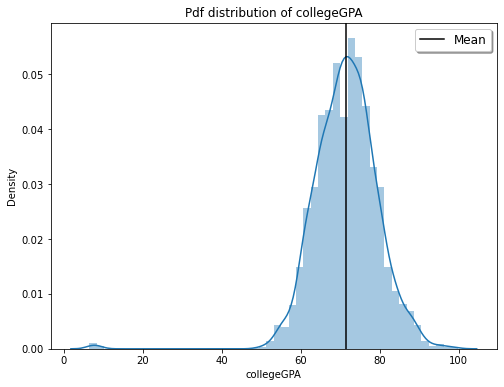

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(df['collegeGPA'])
plt.axvline(df['collegeGPA'].mean(), color="black", label="Mean")
plt.title("Pdf distribution of collegeGPA")
plt.legend(shadow=True,fontsize="larger")

skew = df['collegeGPA'].skew()
kurt = df['collegeGPA'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

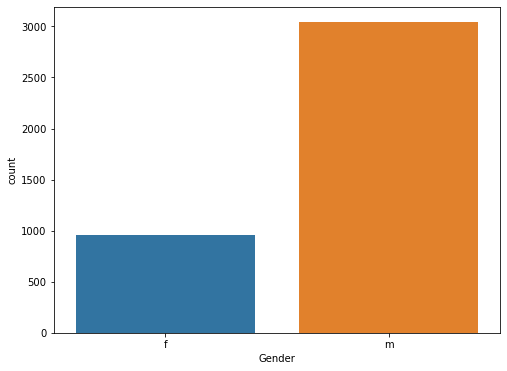

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(df['Gender'])
plt.show()

Text(0.5, 1.0, 'Job Designation of a CSE Fresher')

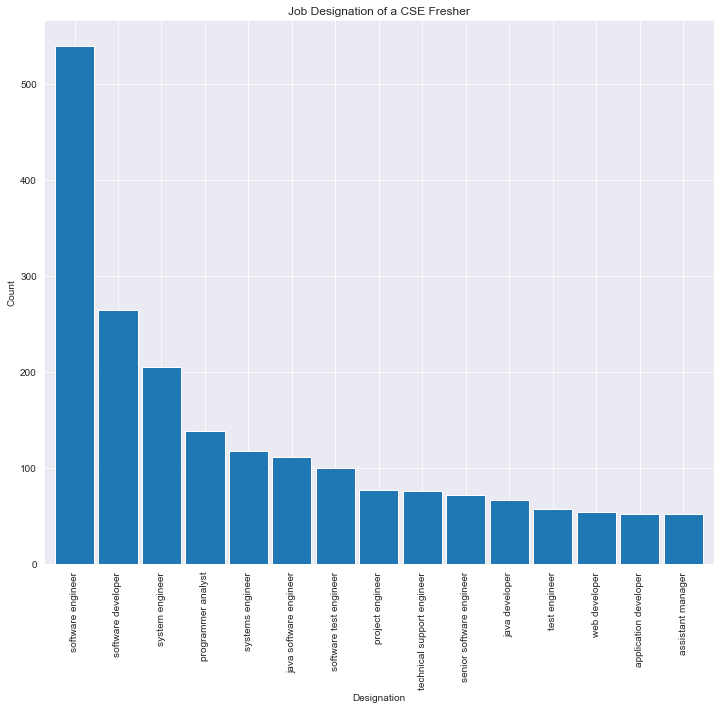

In [15]:
#Plotting the 15 frequent designation
plt.figure(figsize=(12,10))
df['Designation'].value_counts()[:15].plot(kind='bar' , width=0.9)
plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Job Designation of a CSE Fresher')

In [16]:
df['JobCity'].value_counts()

Bangalore      627
-1             461
Noida          368
Hyderabad      335
Pune           290
              ... 
kakinada         1
THANE            1
Roorkee          1
Bathinda         1
Bahadurgarh      1
Name: JobCity, Length: 339, dtype: int64

In [17]:
df['JobCity'].replace(-1,np.nan,inplace=True)
df['JobCity'].dropna(inplace=True)

Text(0.5, 1.0, 'Preferred Cities')

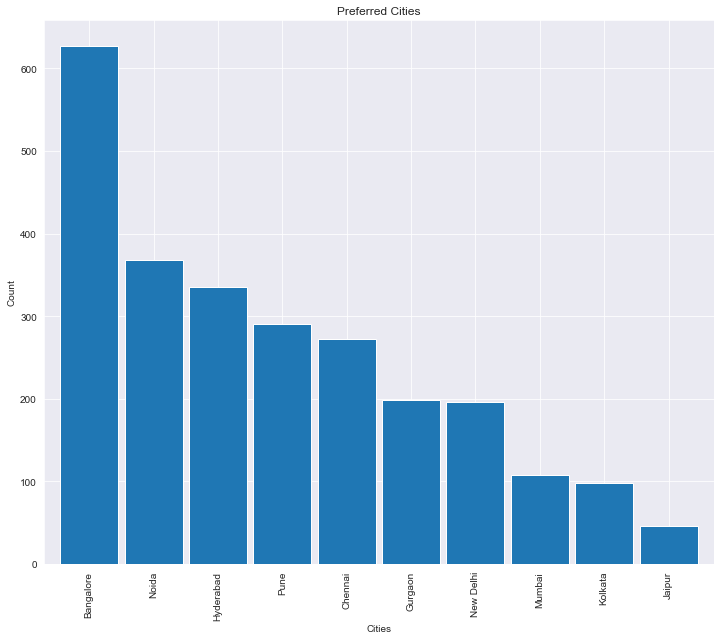

In [18]:
#Plotting the 10 most preferred cities
plt.figure(figsize=(12,10))
df['JobCity'].value_counts()[:10].plot(kind='bar' , width=0.9)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('Preferred Cities')

Text(0.5, 1.0, 'Degree obtained/pursued by the candidate')

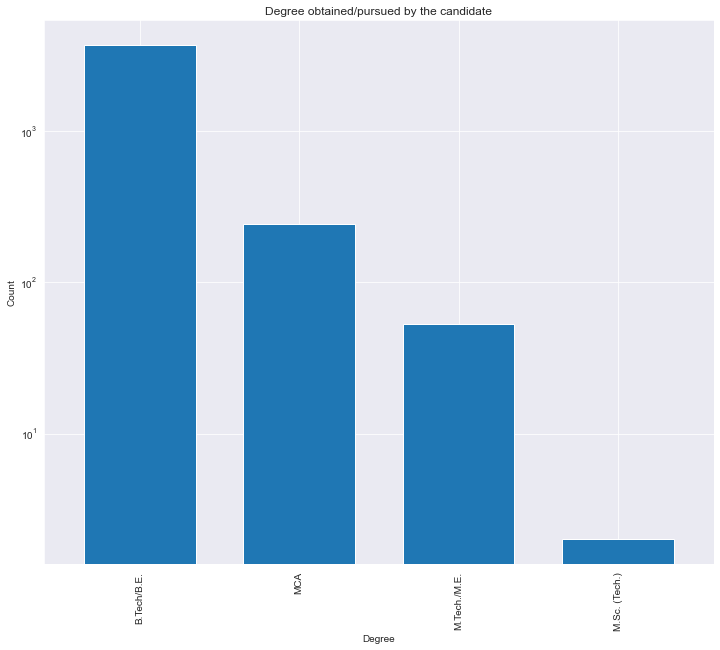

In [19]:
# Plotting the most frequent Degree
plt.figure(figsize=(12,10))
df['Degree'].value_counts().plot(kind='bar' , width=0.7 , logy=True)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree obtained/pursued by the candidate')

Text(0.5, 1.0, 'Specialization pursued by the candidate')

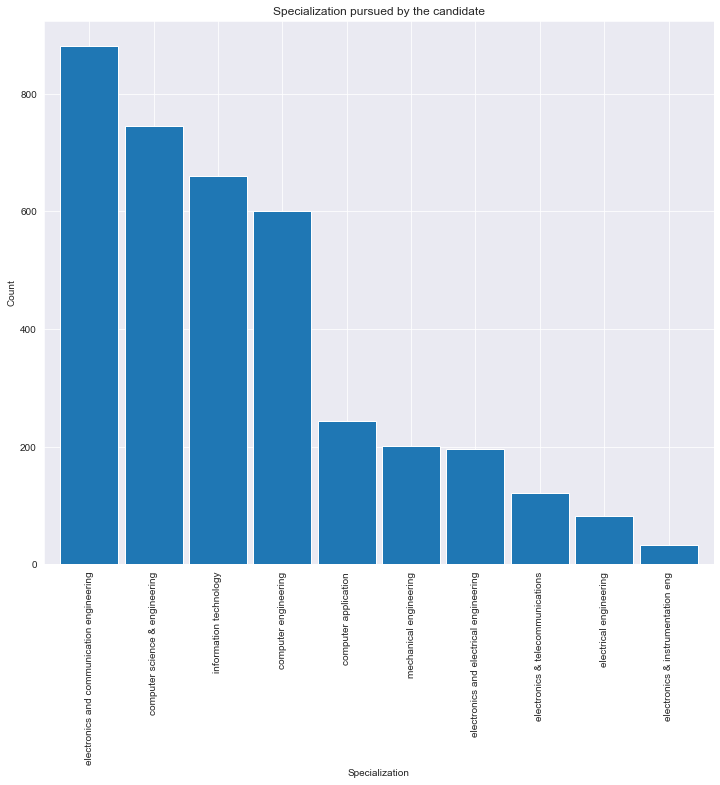

In [20]:
#Plotting the 10 most frequent specialization
plt.figure(figsize=(12,10))
df['Specialization'].value_counts()[:10].plot(kind='bar' , width=0.9)
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Specialization pursued by the candidate')

Text(0.5, 1.0, 'College State Distribution')

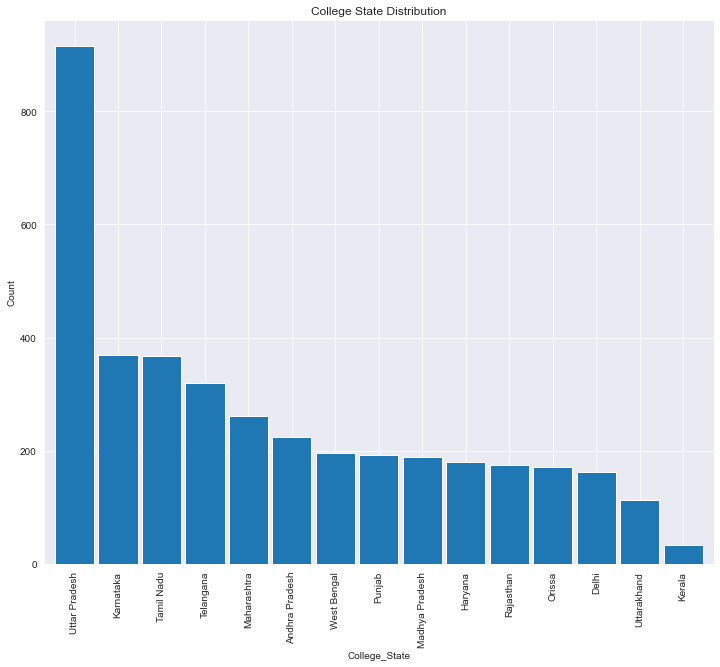

In [21]:
#Plotting the College State Distribution
plt.figure(figsize=(12,10))
df['CollegeState'].value_counts()[:15].plot(kind='bar' , width=0.9)
plt.xlabel('College_State')
plt.ylabel('Count')
plt.title('College State Distribution')

<AxesSubplot:xlabel='10percentage'>

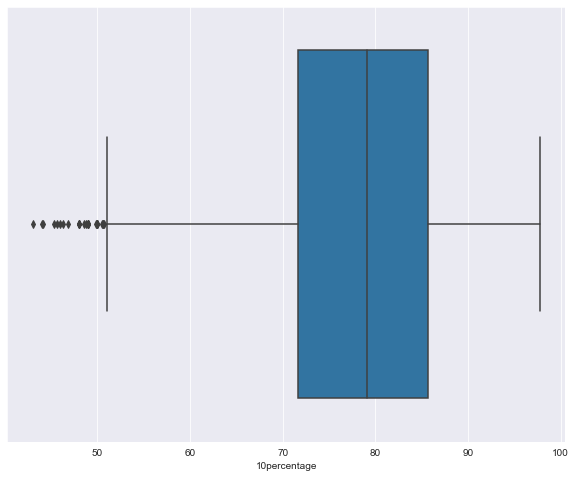

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(df['10percentage'])

<AxesSubplot:xlabel='12percentage'>

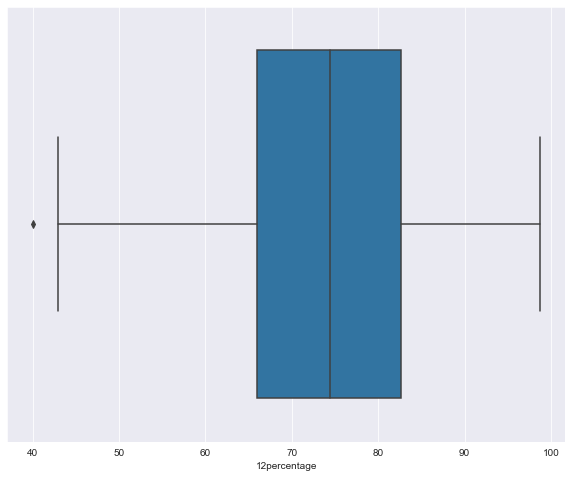

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(df['12percentage'])

<AxesSubplot:xlabel='Salary'>

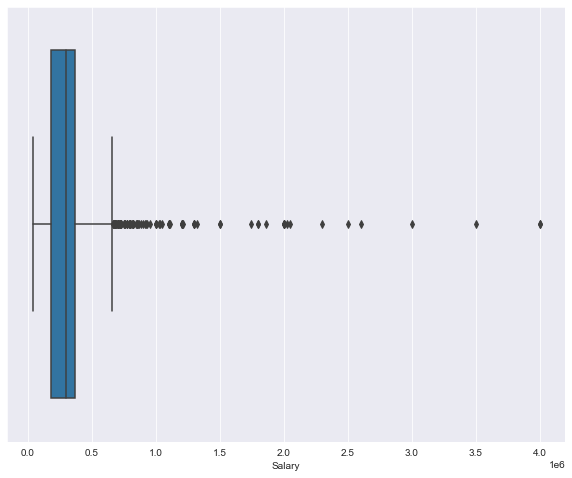

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Salary'])

<AxesSubplot:xlabel='collegeGPA'>

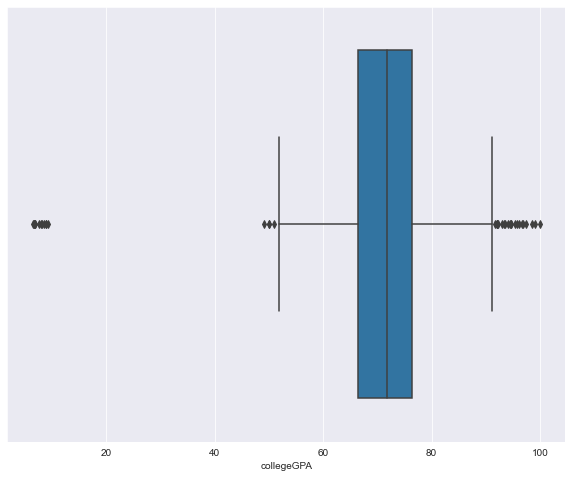

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(df['collegeGPA'])

<AxesSubplot:xlabel='English'>

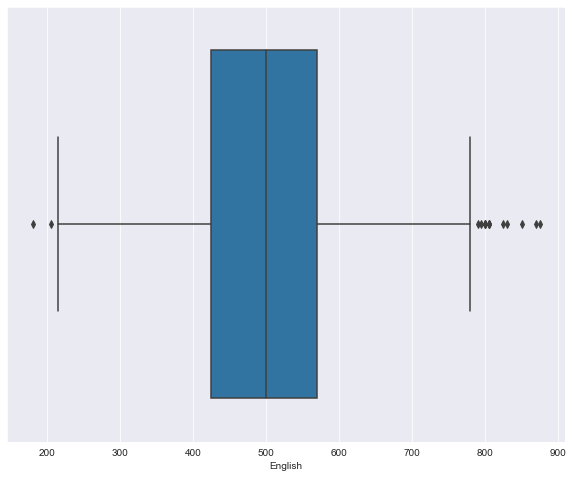

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot(df['English'])

<AxesSubplot:xlabel='Logical'>

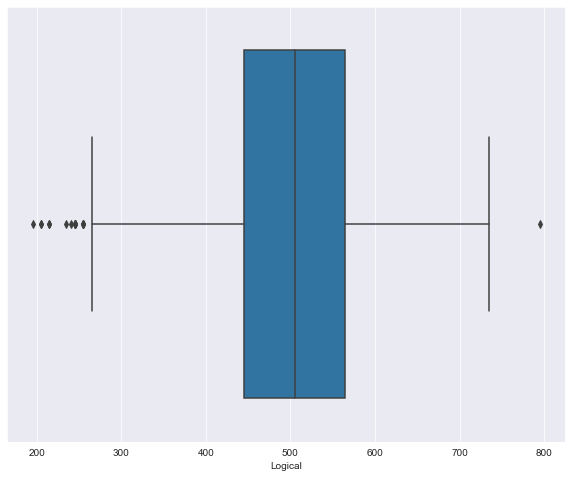

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Logical'])

<AxesSubplot:xlabel='Quant'>

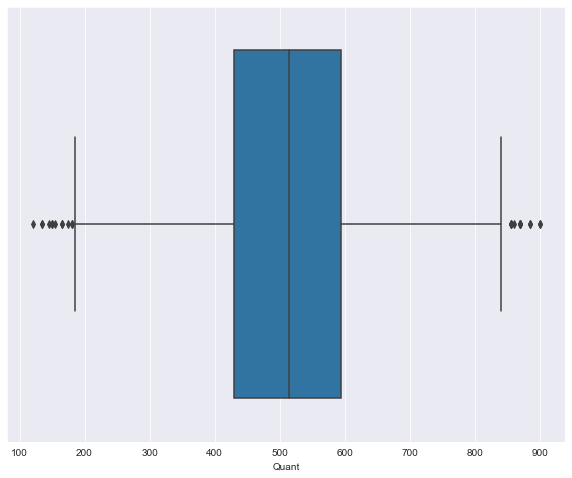

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Quant'])

<AxesSubplot:xlabel='Domain'>

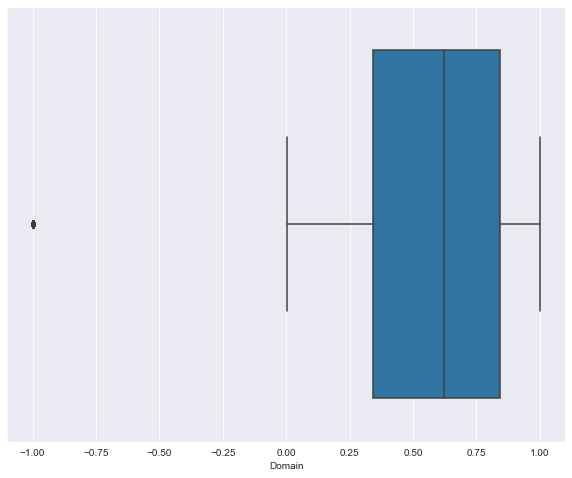

In [29]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Domain'])

<AxesSubplot:xlabel='ComputerProgramming'>

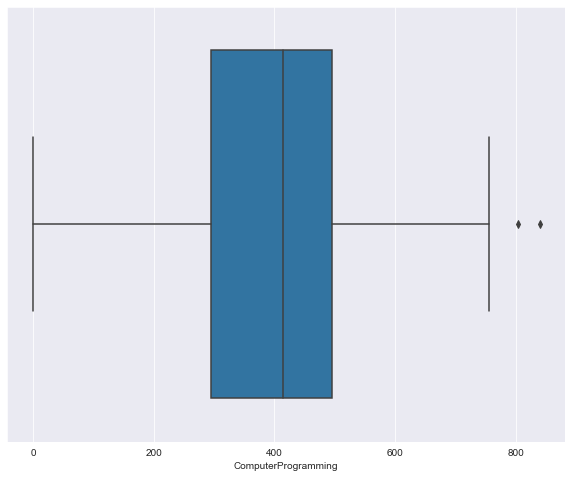

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(df['ComputerProgramming'])

<AxesSubplot:xlabel='ElectronicsAndSemicon'>

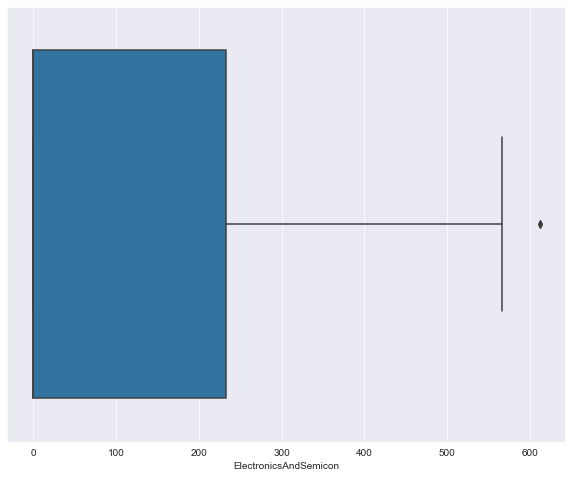

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(df['ElectronicsAndSemicon'])

<AxesSubplot:xlabel='ComputerScience'>

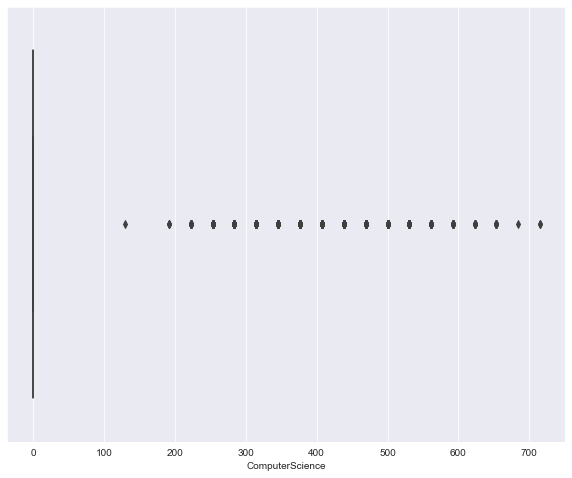

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(df['ComputerScience'])

<AxesSubplot:xlabel='MechanicalEngg'>

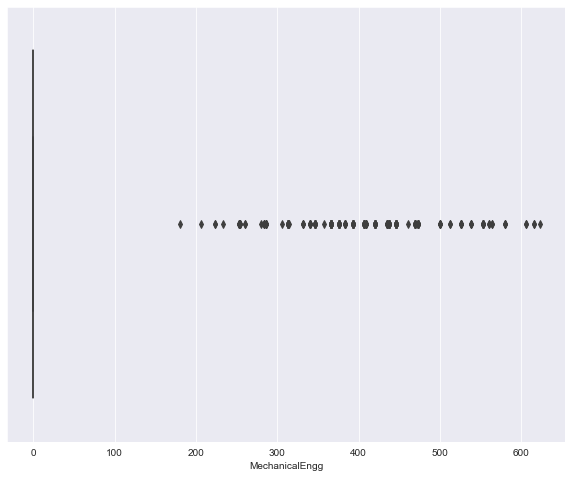

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(df['MechanicalEngg'])

<AxesSubplot:xlabel='ElectricalEngg'>

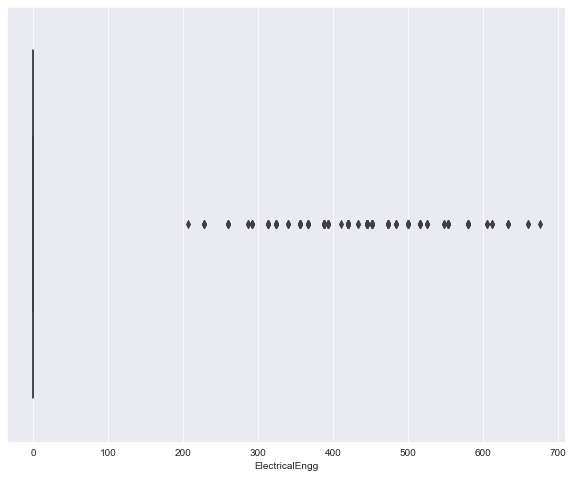

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(df['ElectricalEngg'])

<AxesSubplot:xlabel='TelecomEngg'>

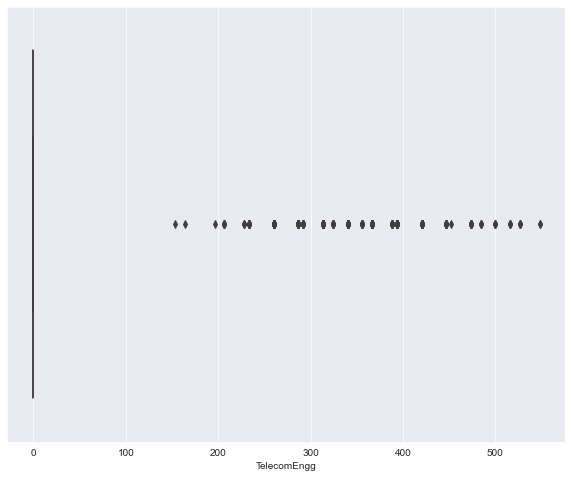

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(df['TelecomEngg'])

***
Corelation Between Columns

In [37]:
df.corr()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,1.000000,-0.247294,0.044547,0.673102,0.007069,0.284540,0.035160,0.047144,0.284540,-0.035977,...,0.482626,-0.026147,0.104454,-0.049272,-0.017871,0.175557,0.024837,0.120979,-0.146289,0.031359
Salary,-0.247294,1.000000,0.177373,-0.161383,0.170254,-0.118690,-0.179332,0.130103,-0.118690,0.015384,...,-0.100720,0.018475,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312
10percentage,0.044547,0.177373,1.000000,0.269957,0.643378,0.021082,-0.126042,0.312538,0.021082,0.116707,...,-0.018933,0.050364,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692
12graduation,0.673102,-0.161383,0.269957,1.000000,0.259166,0.254021,0.027691,0.086001,0.254021,-0.003016,...,0.293439,0.035459,0.123751,0.023470,-0.004727,0.103329,0.041182,0.061956,-0.074369,-0.015069
12percentage,0.007069,0.170254,0.643378,0.259166,1.000000,0.022336,-0.100771,0.346137,0.022336,0.130462,...,-0.043534,0.037635,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332
CollegeID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,...,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeTier,0.035160,-0.179332,-0.126042,0.027691,-0.100771,0.067054,1.000000,-0.086781,0.067054,-0.101494,...,0.001053,-0.021548,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179
collegeGPA,0.047144,0.130103,0.312538,0.086001,0.346137,0.017240,-0.086781,1.000000,0.017240,0.017471,...,0.007601,-0.031765,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071
CollegeCityID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,...,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeCityTier,-0.035977,0.015384,0.116707,-0.003016,0.130462,0.007757,-0.101494,0.017471,0.007757,1.000000,...,-0.010643,-0.052395,0.010311,0.049876,-0.033392,0.014763,0.005565,-0.008203,0.004442,-0.016790


### Research Question No : 1

After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.

In [40]:
print('Average Salary :')
print('Programmer Analyst :',round(df['Salary'][(df['GraduationYear']==2014) & (df['Designation']=='programmer analyst') & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Software Engineer :',round(df['Salary'][(df['GraduationYear']==2014) & (df['Designation']=='software engineer')  & (df['Specialization']=='computer science & engineering')].mean(),2))
print('Hardware Engineer :',round(df['Salary'][(df['GraduationYear']==2014) &(df['Designation']=='hardware engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Associate Engineer :',round(df['Salary'][(df['GraduationYear']==2014) &(df['Designation']=='associate engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))

Average Salary :
Programmer Analyst : 301666.67
Software Engineer : 339500.0
Hardware Engineer : nan
Associate Engineer : 332500.0


The claim is not supported by the data.


### Research Question No : 2

Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

<Figure size 7200x360 with 0 Axes>

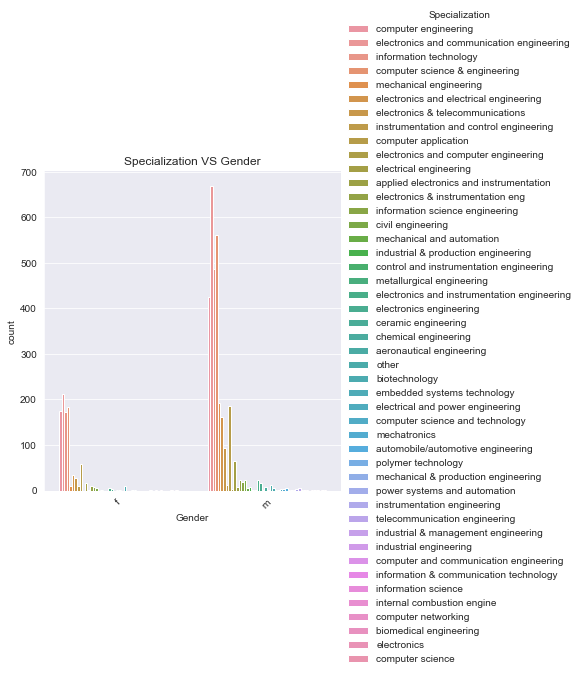

In [49]:
plt.figure(figsize=(100,5))
sns.catplot(x="Gender", hue="Specialization", kind="count", data=df)
plt.title("Specialization VS Gender")
plt.xticks(rotation=45)
plt.show()

The most popular specializations for both males and females are Computer Science and Electronics and Telecommunications (ETRX), which make up more than half of their respective proportions.